In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [35]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
df['sex'] = df['sex'].map({'female': 1, 'male': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [37]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,age,int64,47,0,"[18, 19, 50, 51, 47, 46, 45, 20, 48, 52]",1
1,sex,int64,2,0,"[0, 1]",1
2,bmi,float64,548,0,"[32.3, 28.31, 30.495, 30.875, 31.35, 30.8, 34....",1
3,children,int64,6,0,"[0, 1, 2, 3, 4, 5]",1
4,smoker,int64,2,0,"[0, 1]",1
5,region,int64,4,0,"[2, 1, 3, 4]",1
6,charges,float64,1337,0,"[1639.5631, 16884.924, 29330.98315, 2221.56445...",1


1 duplicate needs to be dropped

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


contains no nulls

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.duplicated().sum()

0

Column 'sex' is not countinuous.
Column 'children' is not countinuous.
Column 'smoker' is not countinuous.
Column 'region' is not countinuous.
Column 'charges' is not countinuous.


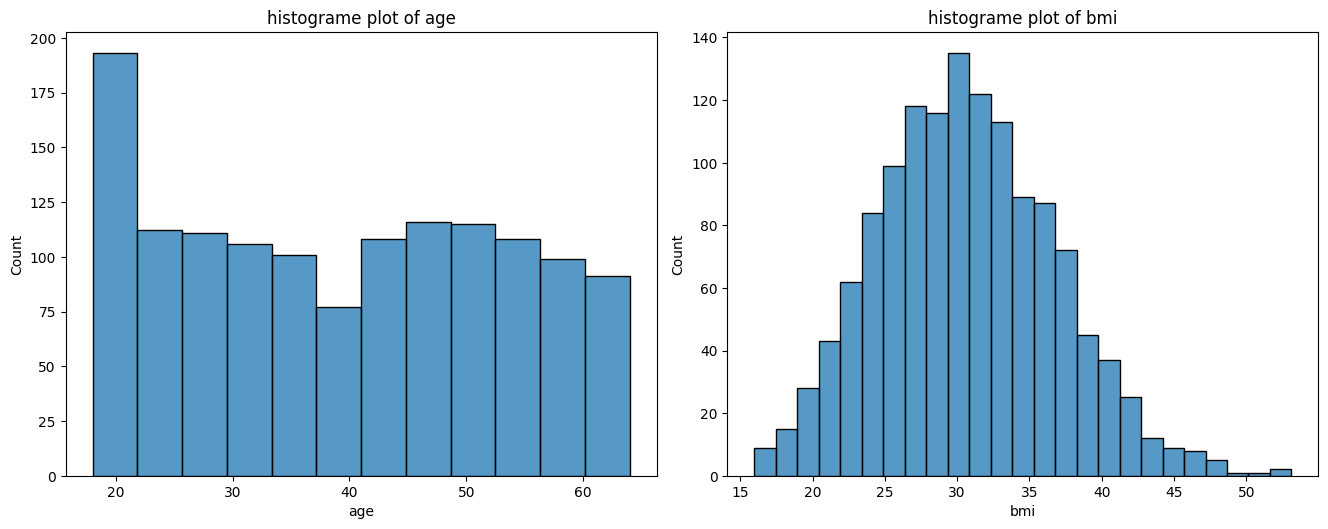

In [41]:
cleaner.continuous_plot(df,df.columns,7)

Column 'age' is not categorical.
Column 'bmi' is not categorical.
Column 'charges' is not categorical.


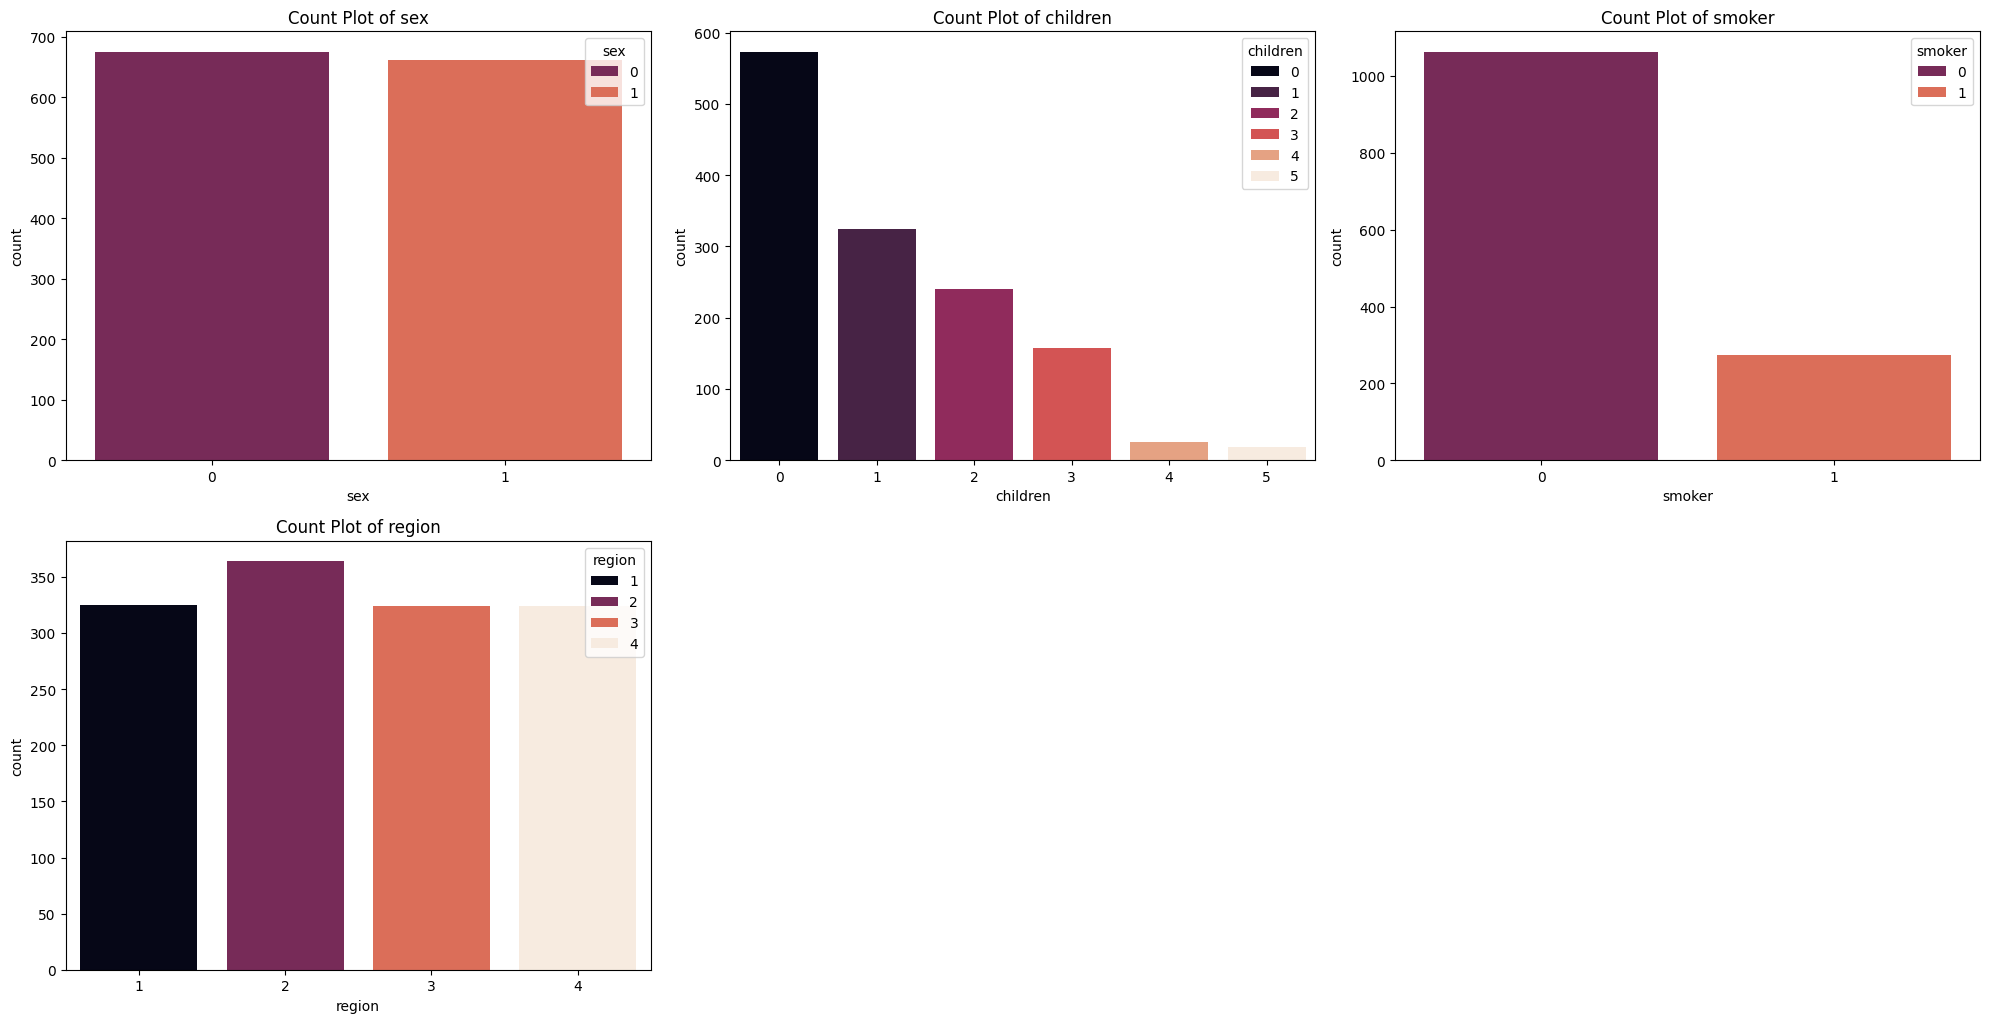

In [42]:
cleaner.categorical_plot(df,df.columns,6)

In [43]:
numerical_columns = ['age', 'bmi', 'charges']

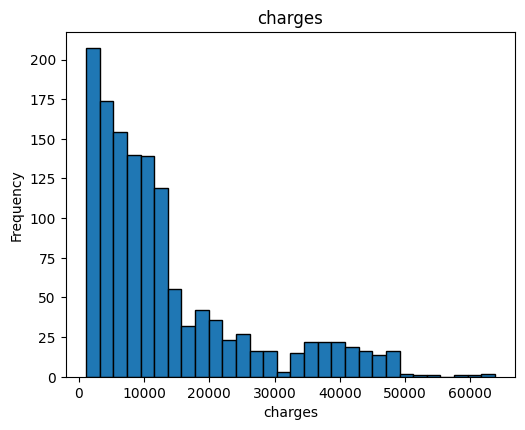

In [44]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, i)
plt.hist(df['charges'], bins=30, edgecolor='k')
plt.title(f'charges')
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

charges is right skewed

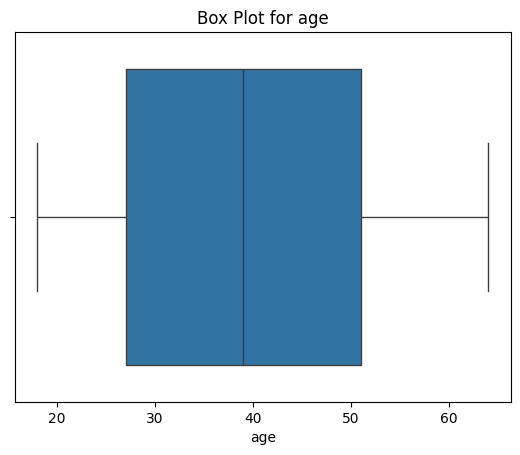

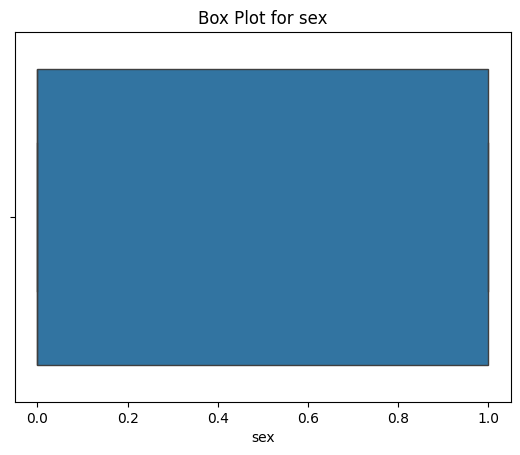

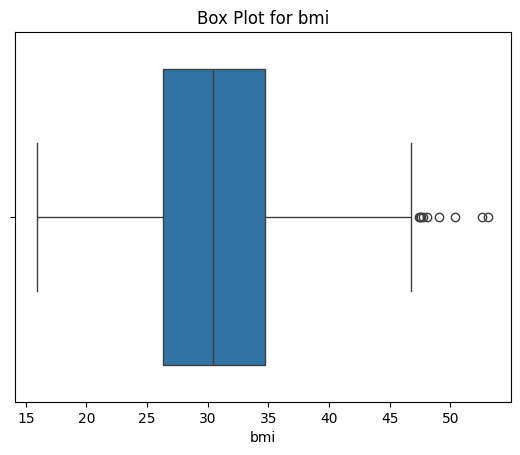

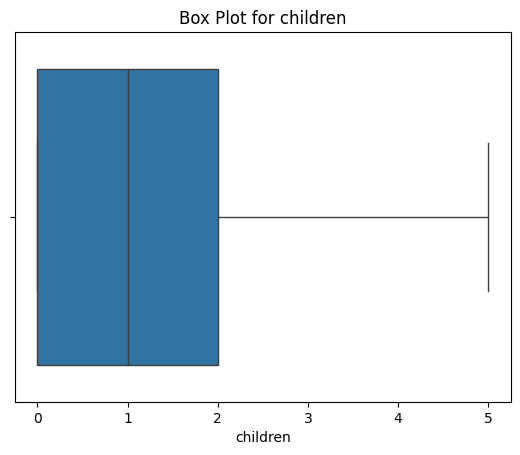

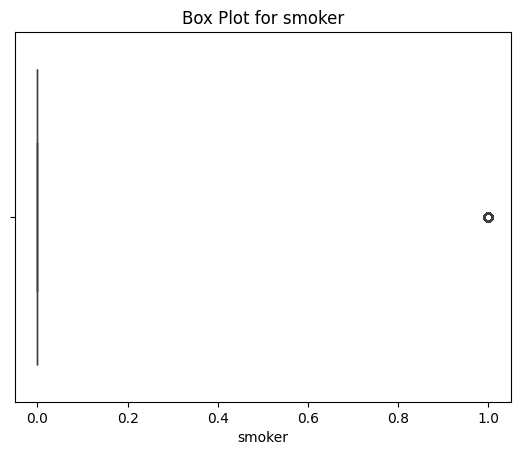

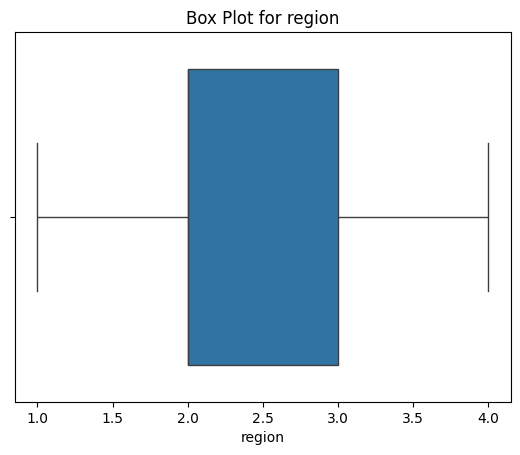

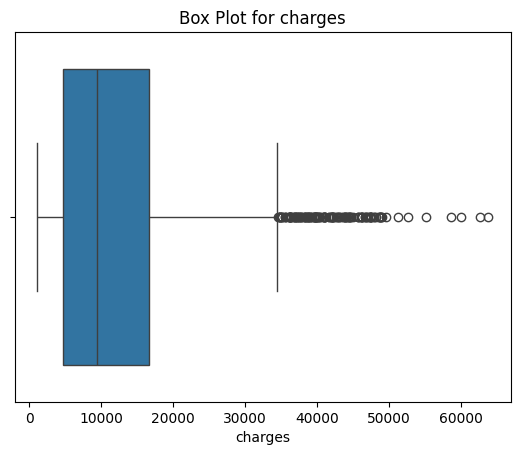

In [45]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"Box Plot for {column}")
  plt.show()


BMI and Charges contain outliers

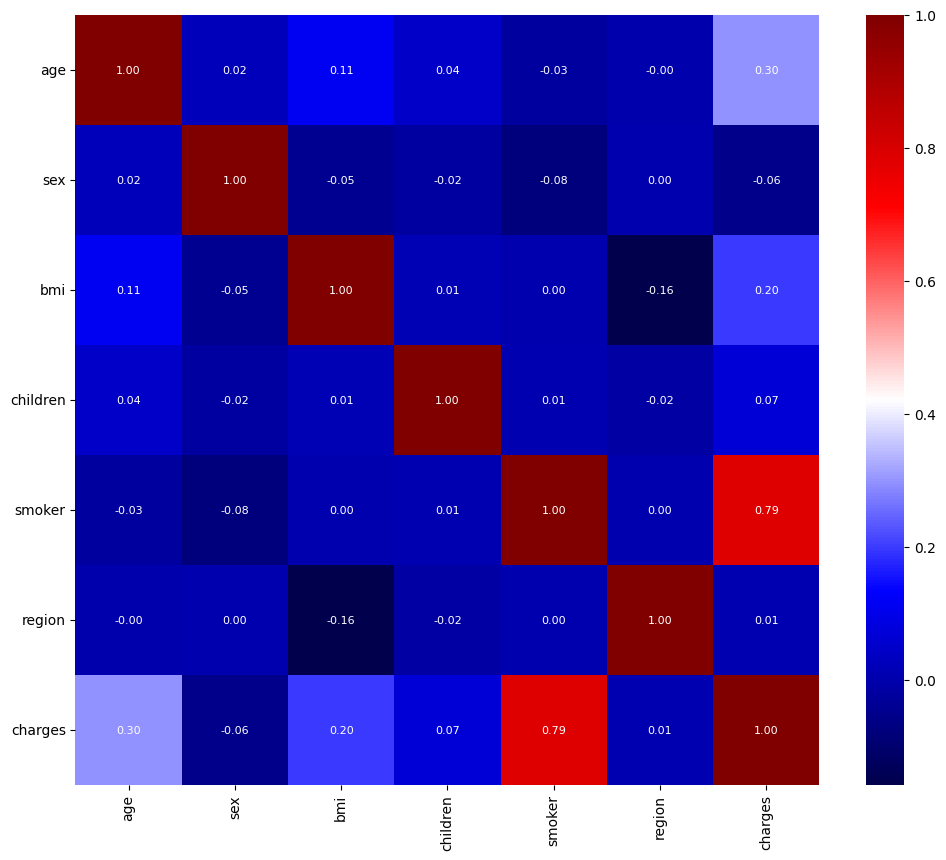

In [46]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="seismic", fmt=".2f", annot_kws={"size": 8})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Smoker has strong correlation with charges

In [47]:
df=cleaner.remove_outliers_iqr_countinuous(df,df.columns)

In [48]:
df.shape

(1011, 7)

1338 reduced to 1011

In [49]:
df.skew(numeric_only=True).sort_values(ascending=False)

children    1.023905
charges     0.649061
bmi         0.165658
age         0.066910
region      0.032275
smoker      0.000000
sex        -0.061445
dtype: float64

we should apply log transformation to charges

In [50]:
df['charges']=np.log(df['charges'])

In [51]:
df.skew(numeric_only=True).sort_values(ascending=False)

children    1.023905
bmi         0.165658
age         0.066910
region      0.032275
smoker      0.000000
sex        -0.061445
charges    -0.515627
dtype: float64

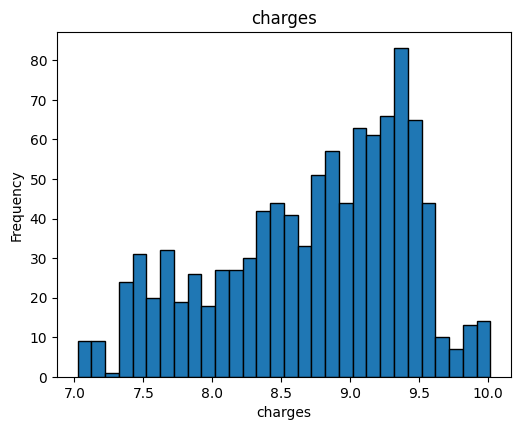

In [52]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, i)
plt.hist(df['charges'], bins=30, edgecolor='k')
plt.title(f'charges')
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number'])
df[numeric_columns.columns] = scaler.fit_transform(df[numeric_columns.columns])

In [54]:
df

,age,sex,bmi,children,smoker,region,charges
0,-1.505658,-1.031148,0.546156,-0.066249,0.0,-0.423309,-1.838173
1,-0.791470,-1.031148,0.416229,1.567364,0.0,-0.423309,-0.470181
2,-0.434376,-1.031148,-1.320912,-0.883056,0.0,0.473893,1.836996
3,-0.505795,-1.031148,-0.278965,-0.883056,0.0,0.473893,-0.672861
4,-0.577214,0.969793,-0.808797,-0.883056,0.0,-0.423309,-0.714629
...,...,...,...,...,...,...,...
1006,0.922581,0.969793,2.390445,1.567364,0.0,-1.320510,0.890040
1007,0.779744,-1.031148,0.073694,1.567364,0.0,0.473893,0.783557
1008,-1.505658,0.969793,0.233994,-0.883056,0.0,1.371094,-1.483443
1009,-1.505658,0.969793,1.065864,-0.883056,0.0,-0.423309,-1.920592


In [55]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [56]:
x= df.drop('charges',axis=1)
y=df['charges']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [59]:
lin.score(x_train,y_train)

0.7493167888974117

In [63]:
lin.score(x_test,y_test)

0.8247917089204966

In [61]:
y_pred_test=lin.predict(x_test)
y_pred_train=lin.predict(x_train)

In [62]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred_test))
print(mean_squared_error(y_train,y_pred_train))

0.16686081735003036
0.2533116358677244


In [64]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
DT = DecisionTreeRegressor(max_depth=4,random_state=42)
DT.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [68]:
DT.score(x_train,y_train)

0.771968906072207

In [69]:
DT.score(x_test,y_test)

0.8346359853157375

In [70]:
y_pred_test=DT.predict(x_test)
y_pred_train=DT.predict(x_train)

In [71]:
print(mean_squared_error(y_test,y_pred_test))
print(mean_squared_error(y_train,y_pred_train))

0.15748555322634714
0.2304220102235621


In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 15, 20]
}

In [75]:
dtr = DecisionTreeRegressor(random_state=42)
model = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [76]:
model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [80]:
best_model = model.best_estimator_
y_pred_test = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

In [81]:
print(mse_test)
print(mse_train)

0.19062458731266532
0.1978226251614793


In [82]:
best_model.score(x_train,y_train)

0.8042300317774629

In [83]:
best_model.score(x_test,y_test)

0.7998391191460766